# Letter Recognition

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [3]:
letters = pd.read_csv("C:\\Users\\HP\\Desktop\\letters.csv")

In [4]:
letters.shape


(20000, 17)

In [6]:
letters.describe()

xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.380823      2.488475   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

            x2ybar        xy2bar         xedge        xedgey         yedge  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.45400      7.929000      3.046100      8.338850      3.691750   
std        2.63107      2.080619      2.332541      1.546722      2.567073   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        5.00000      7.000000      1.000000      8.000000      2.000000   
50%        6.00000      8.000000      3.000000      8.000000      3.000000   
75%        8.00000      9.000000      4.000000      9.000000      5.000000   
max       15.00000     15.000000     15.000000     15.000000     15.000000   

            yedgex  
count  20000.00000  
mean       7.80120  
std        1.61747  
min        0.00000  
25%        7.00000  
50%        8.00000  
75%        9.00000  
max       15.00000

In [7]:
letters.head()

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10

In [9]:
letters.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

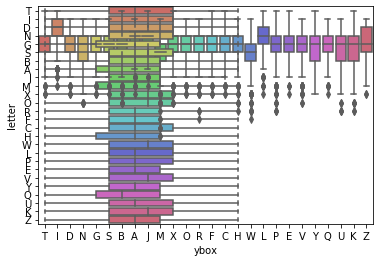

In [12]:
sns.boxplot(x="letter",y="xbox",data=letters,palette = "hls")
sns.boxplot(x="ybox",y="letter",data=letters,palette = "hls")

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
train,test = train_test_split(letters,test_size = 0.3)
test.head()

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
14316      J     1     4      3       3      1     9     6      2      6   
4509       R     2     1      3       2      2     7     8      5      5   
10654      E     1     0      1       1      1     5     7      5      7   
13766      B     5     8      8       6      5     9     7      4      7   
19299      T     8    11      8       8      7     6    11      3      7   

       xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
14316     14       4       8      0       7      0       8  
4509       7       5       6      2       7      4       8  
10654      7       6      12      0       8      6       9  
13766     10       5       6      2       8      6      10  
19299     11       9       5      5      11      4       3

In [14]:
train_X = train.iloc[:,1:]
train_y = train.iloc[:,0]
test_X  = test.iloc[:,1:]
test_y  = test.iloc[:,0]

In [15]:
# kernel = linear
help(SVC)
model_linear = SVC(kernel = "linear")
model_linear.fit(train_X,train_y)
pred_test_linear = model_linear.predict(test_X)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.linear_model.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  othe

In [16]:
# Accuracy
np.mean(pred_test_linear==test_y) 

0.8563333333333333

In [17]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(train_X,train_y)
pred_test_poly = model_poly.predict(test_X)

np.mean(pred_test_poly==test_y) 

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9476666666666667

In [18]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(train_X,train_y)
pred_test_rbf = model_rbf.predict(test_X)

np.mean(pred_test_rbf==test_y) 

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9741666666666666

# Letter Recognition, apply support vector machine classification techniques     #  and build three different   kernal  model
# with respect to kernal
# 1. Linear kernal has  Accuracy = 0.8563333333333333
# 2. Kernal poly has Accuracy = 0.9476666666666667
# 3. Kernal rbf has Accuracy = 0.9741666666666666
# It has been observe that Kernal rbf get maximum  Accuracy out of these  SVM kernal model.